In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

#Import OS
import os


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54dc51afe3cfc555d7e0ae9a1f8344af


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | matamoros
Processing Record 3 of Set 1 | krasnoarmeysk
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ukiah
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | bobo dioulasso
Processing Record 11 of Set 1 | redmond
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rizhao
Processing Record 14 of Set 1 | halalo
City not found. Skipping...
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | tonj
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | muros
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | komsomolskiy
Processing Record 38 of Set 4 | savinka
Processing Record 39 of Set 4 | qaqortoq
Processing Record 40 of Set 4 | mkushi
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | taree
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | mnogovershinnyy
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | salamanca
Processing Record 49 of Set 4 | moose factory
Processing Record 50 of Set 4 | hammelburg
Processing Record 1 of Set 5 | aykhal
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | kiunga
Processing Record 4 of Set 5 | pudozh
Processing Record 5 of Set 5 | kedrovyy
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | buala
Processing Record 9 of Set 5 | grand river south east
City not f

Processing Record 24 of Set 8 | dzhebariki-khaya
Processing Record 25 of Set 8 | verkhniy rohachyk
Processing Record 26 of Set 8 | asau
Processing Record 27 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 28 of Set 8 | conselheiro pena
Processing Record 29 of Set 8 | miandrivazo
Processing Record 30 of Set 8 | tawkar
City not found. Skipping...
Processing Record 31 of Set 8 | brokopondo
Processing Record 32 of Set 8 | ullapool
Processing Record 33 of Set 8 | harper
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | gobabis
Processing Record 37 of Set 8 | kachiry
Processing Record 38 of Set 8 | nioro
Processing Record 39 of Set 8 | takaka
Processing Record 40 of Set 8 | narsaq
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | ekhabi
Processing Record 45 of Set 8 | caconda
Processing Record 46 of S

Processing Record 13 of Set 12 | sinnamary
Processing Record 14 of Set 12 | saint-ambroise
Processing Record 15 of Set 12 | ceatalchioi
Processing Record 16 of Set 12 | egvekinot
Processing Record 17 of Set 12 | karachi
Processing Record 18 of Set 12 | lannion
Processing Record 19 of Set 12 | verkhnevilyuysk
Processing Record 20 of Set 12 | balclutha
Processing Record 21 of Set 12 | villa carlos paz
Processing Record 22 of Set 12 | siteki
Processing Record 23 of Set 12 | lodja
Processing Record 24 of Set 12 | kita
Processing Record 25 of Set 12 | vangaindrano
Processing Record 26 of Set 12 | manaure
Processing Record 27 of Set 12 | tawau
Processing Record 28 of Set 12 | turukhansk
Processing Record 29 of Set 12 | graaff-reinet
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | qasigiannguit
Processing Record 32 of Set 12 | jiujiang
Processing Record 33 of Set 12 | bantry
Processing Record 34 of Set 12 | caruray
Processing Record 35 of Set 12 | sumbawanga
Process

In [7]:
len(city_data)

593

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Matamoros,25.53,-103.25,78.80,36,5,13.87,MX,2020-02-21 02:11:31
1,Krasnoarmeysk,51.02,45.70,35.01,63,91,3.00,RU,2020-02-21 02:13:44
2,Norman Wells,65.28,-126.83,21.20,85,40,6.93,CA,2020-02-21 02:11:22
3,Rikitea,-23.12,-134.97,78.60,75,80,11.27,PF,2020-02-21 02:10:57
4,Ukiah,39.15,-123.21,57.00,61,100,2.46,US,2020-02-21 02:13:45
5,Hermanus,-34.42,19.23,63.00,92,0,12.24,ZA,2020-02-21 02:10:56
6,Busselton,-33.65,115.33,91.00,20,100,8.50,AU,2020-02-21 02:11:10
7,Qaanaaq,77.48,-69.36,-13.88,54,0,4.74,GL,2020-02-21 02:11:29
8,Bobo Dioulasso,11.18,-4.30,82.40,39,0,9.17,BF,2020-02-21 02:13:45
9,Redmond,47.67,-122.12,51.80,49,1,4.43,US,2020-02-21 02:13:17


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Matamoros,MX,2020-02-21 02:11:31,25.53,-103.25,78.80,36,5,13.87
1,Krasnoarmeysk,RU,2020-02-21 02:13:44,51.02,45.70,35.01,63,91,3.00
2,Norman Wells,CA,2020-02-21 02:11:22,65.28,-126.83,21.20,85,40,6.93
3,Rikitea,PF,2020-02-21 02:10:57,-23.12,-134.97,78.60,75,80,11.27
4,Ukiah,US,2020-02-21 02:13:45,39.15,-123.21,57.00,61,100,2.46
5,Hermanus,ZA,2020-02-21 02:10:56,-34.42,19.23,63.00,92,0,12.24
6,Busselton,AU,2020-02-21 02:11:10,-33.65,115.33,91.00,20,100,8.50
7,Qaanaaq,GL,2020-02-21 02:11:29,77.48,-69.36,-13.88,54,0,4.74
8,Bobo Dioulasso,BF,2020-02-21 02:13:45,11.18,-4.30,82.40,39,0,9.17
9,Redmond,US,2020-02-21 02:13:17,47.67,-122.12,51.80,49,1,4.43


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582252818.676746

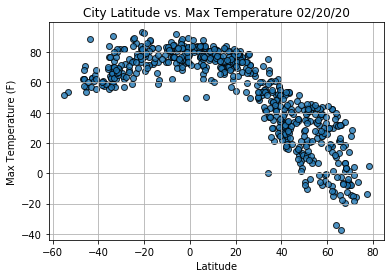

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

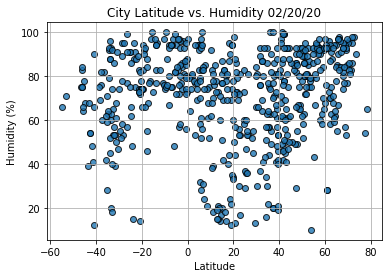

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

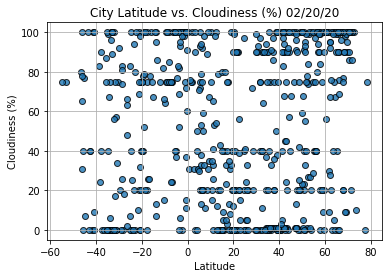

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

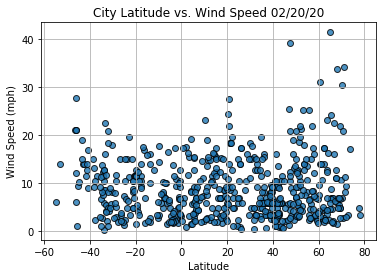

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()